In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from tensorflow import keras
from keras import layers
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


FEATURES = [
    "Age","Sex","ChestPainType","RestingBP","Cholesterol","FastingBS","RestingECG","MaxHR","ExerciseAngina","Oldpeak","ST_Slope"
]


dataset_filename = "train.csv"
  
alldata = pd.read_csv(
    dataset_filename,
    header=0,
    sep=",",
    usecols=[
        "Age","Sex","ChestPainType","RestingBP","Cholesterol","FastingBS","RestingECG","MaxHR","ExerciseAngina","Oldpeak","ST_Slope","HeartDisease","PatientId"
    ],
)

def preprocess(alldata):
    alldata.Sex = alldata.Sex.replace({'M': 0, 'F': 1})
    alldata.ChestPainType = alldata.ChestPainType.astype('category')
    alldata.ChestPainType = alldata.ChestPainType.cat.codes
    alldata.RestingECG = alldata.RestingECG.astype('category')
    alldata.RestingECG = alldata.RestingECG.cat.codes
    alldata.ExerciseAngina = alldata.ExerciseAngina.replace({'Y': 1, 'N': 0})
    alldata.ST_Slope = alldata.ST_Slope.astype('category')
    alldata.ST_Slope = alldata.ST_Slope.cat.codes

    print(alldata)

#train dataset processing
preprocess(alldata)

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     62    0              1        131            0          0           1   
1     60    0              0        135            0          0           1   
2     50    0              0        150          215          0           1   
3     61    1              1        140          298          1           1   
4     53    0              0        125            0          1           1   
..   ...  ...            ...        ...          ...        ...         ...   
683   51    0              0        131          152          1           0   
684   52    0              0        125          212          0           1   
685   41    0              0        104            0          0           2   
686   56    0              0        140            0          1           1   
687   33    1              0        100          246          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  Hear

In [14]:
y_train = pd.DataFrame(alldata["HeartDisease"])
x_train = pd.DataFrame(alldata[FEATURES])

In [15]:
#test dataset processing

test_data = pd.read_csv(
    "test.csv",
    header=0,
    sep=",",
    usecols=[
        "Age","Sex","ChestPainType","RestingBP","Cholesterol","FastingBS","RestingECG","MaxHR","ExerciseAngina","Oldpeak","ST_Slope","PatientId"
    ],
)

preprocess(test_data)

x_test = test_data[FEATURES]

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     76    1              2        140          197          0           2   
1     57    0              0        110            0          1           2   
2     60    1              3        150          240          0           1   
3     51    1              2        140          308          0           0   
4     61    0              3        134          234          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
225   57    0              0        152          274          0           1   
226   70    0              0        140            0          1           1   
227   45    1              0        132          297          0           1   
228   50    0              0        115            0          0           1   
229   47    0              2        130          253          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  Pati

In [16]:
scaler = StandardScaler()

scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

Text(0, 0.5, 'cumulative explained variance')

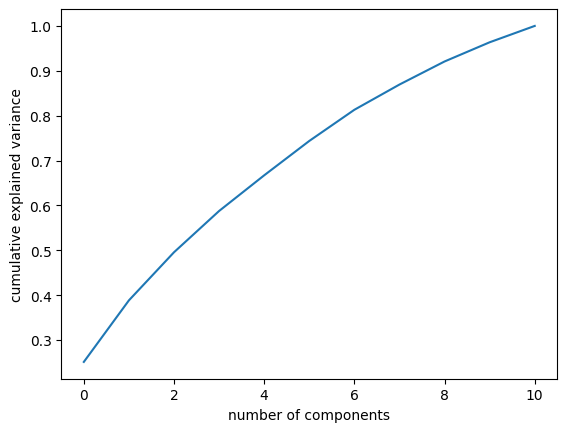

In [17]:
#checking the cumulative explained variance to choose proper amount of class for a model to avoid overfitting

pca = PCA().fit(x_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [18]:
pca = PCA(.85)

In [19]:
pca.fit(x_train)

PCA(n_components=0.85)

In [20]:
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

In [21]:
#spliting dataset into train and validation one

x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.4,random_state=1)

In [22]:
num_classes = 8
input_shape = (688,)


model = keras.Sequential(
    [   
        layers.Dense(8, input_dim = num_classes, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(4, activation="relu"),
        layers.Dense(1, activation="sigmoid"), 
    ]
)

model.summary()

c:\Users\olgak\miniconda3\envs\appliedNLP\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113 (452.00 B)

 Trainable params: 113 (452.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [24]:
model.fit(x_train,y_train,epochs=170,verbose=1)

Epoch 1/170
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4317 - loss: 0.8326  
Epoch 2/170
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - accuracy: 0.4623 - loss: 0.7813
Epoch 3/170
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - accuracy: 0.4637 - loss: 0.7590
Epoch 4/170
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4435 - loss: 0.7514 
Epoch 5/170
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - accuracy: 0.4586 - loss: 0.7379
Epoch 6/170
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4898 - loss: 0.7249 
Epoch 7/170
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - accuracy: 0.5366 - loss: 0.7041
Epoch 8/170
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - accuracy: 0.5717 - loss: 0.6835
Epoch 9/170
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - accuracy: 0.5856 - loss: 0.6859
Epoch 10/170
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6148 - loss: 0.6646 
Epoch 11/170
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - accuracy: 0.6218 - loss: 0.6530
Epoch 12/170
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2

In [25]:
prediction = model.predict(x_train)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [26]:
train_accuracy = accuracy_score(y_train, prediction.round())
print(train_accuracy)

0.883495145631068


In [27]:
y_test_val = model.predict(x_val)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step


In [28]:
y_test_val = np.round(y_test_val, decimals=0)

val_accuracy = accuracy_score(y_val,y_test_val)
print(val_accuracy)

0.8405797101449275


In [29]:
y_test = model.predict(x_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step


In [30]:
y_test= np.round(y_test, decimals=0)

In [31]:
d = {"PatientId": test_data.PatientId, "HeartDisease": np.squeeze(y_test)}

submission = pd.DataFrame(data=d)
print(submission)

     PatientId  HeartDisease
0          688           0.0
1          297           1.0
2          678           0.0
3          859           0.0
4          628           1.0
..         ...           ...
225        737           1.0
226        378           1.0
227         66           0.0
228        381           1.0
229        896           0.0

[230 rows x 2 columns]


In [32]:
submission.HeartDisease = [int(i) for i in submission.HeartDisease]

In [33]:
submission.to_csv("submission_file.csv", index=False)